#토마토 잎 분석을 통해 토마토의 상태를 알려주는 딥러닝 모델 구현 

1. 데이터 선정이유 

약재를 재배함에 있어서 좋은 약재를 유통시키기 위해서는 1차적으로 좋은 약재를 생산해야합니다.  

한의학에서 토마토는 번가(番茄), 서홍(西紅)시, 번이자(番李子)로 부르기도 하는 토마토의 잎을 보고 토마토의 상태를 알려주는 딥러닝 모델을 만들고 싶어 해당 프로젝트를 진행하게 되었습니다.

- 데이터 

kaggle의 Tomato leaf disease detection

https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf

- 데이터 설명

Tomatomosaicvirus - 토마토 모자이크 바이러스 

Target_Spot- 표적 반점 

Bacterial_spot - 세균 반점  

TomatoYellowLeafCurlVirus - 토마토황화잎말림바이러스 

Late_blight - 역병
-->아일랜드 감자 기근을 일으킨 병원균

Leaf_Mold - 잎 곰팡이

Early_blight- 토마토 초기 역병

Spidermites Two-spottedspider_mite - 점박이진드기 

Tomato___healthy

Septorialeafspot - Septorial 잎 반점

In [ ]:
import numpy as np 
import pandas as pd 
import os
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path= '/content/drive/MyDrive/archive/tomato'
train_path = os.path.join(path, "train")
print(os.listdir(train_path))

['Tomato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Bacterial_spot']


In [ ]:
test_path = os.path.join(path, "val")
print(os.listdir(test_path))

['Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Bacterial_spot']


In [ ]:
from glob import glob
folders = glob("/content/drive/MyDrive/archive/tomato/train/*")
folders

['/content/drive/MyDrive/archive/tomato/train/Tomato___healthy',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/archive/tomato/train/Tomato___Bacterial_spot']

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
SIZE = [128,128]

In [ ]:
#import VGG19 

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
vgg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation="softmax")(x)

model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model_vgg19.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen_vg19 = ImageDataGenerator(rescale=1./255)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [ ]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode="categorical", 
                                                 shuffle=True)

Found 10000 images belonging to 10 classes.


In [ ]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(128, 128),
                                                 batch_size=32,
                                                 class_mode="categorical", 
                                                 shuffle=False)

Found 1000 images belonging to 10 classes.


In [ ]:
r= model_vgg19.fit(trainning_set_vg19,validation_data=testing_set_vg19 ,validation_batch_size=64,epochs=10)

Epoch 1/10
313/313 [==============================] - 42s 129ms/step - loss: 1.5597 - acc: 0.5534 - val_loss: 1.2061 - val_acc: 0.6380
Epoch 2/10
313/313 [==============================] - 25s 80ms/step - loss: 0.9958 - acc: 0.7126 - val_loss: 0.9773 - val_acc: 0.7050
Epoch 3/10
313/313 [==============================] - 25s 80ms/step - loss: 0.8161 - acc: 0.7559 - val_loss: 0.8625 - val_acc: 0.7190
Epoch 4/10
313/313 [==============================] - 25s 79ms/step - loss: 0.7162 - acc: 0.7819 - val_loss: 0.8083 - val_acc: 0.7320
Epoch 5/10
313/313 [==============================] - 25s 79ms/step - loss: 0.6517 - acc: 0.8036 - val_loss: 0.7586 - val_acc: 0.7560
Epoch 6/10
313/313 [==============================] - 25s 79ms/step - loss: 0.6011 - acc: 0.8209 - val_loss: 0.7186 - val_acc: 0.7760
Epoch 7/10
313/313 [==============================] - 25s 81ms/step - loss: 0.5626 - acc: 0.8300 - val_loss: 0.6993 - val_acc: 0.7750
Epoch 8/10
313/313 [==============================] - 25s 79m

In [ ]:
score_train = model_vgg19.evaluate(trainning_set_vg19, verbose=2)
accuracy_train = 100*score_train[1]
print('Train accuracy = %.4f%% ' % accuracy_train) 

score_val = model_vgg19.evaluate(testing_set_vg19 , verbose=2)
accuracy_val = 100*score_val[1]
print('Validate accuracy = %.4f%% ' % accuracy_val)

313/313 - 22s - loss: 0.4596 - acc: 0.8637 - 22s/epoch - 69ms/step
Train accuracy = 86.3700% 
32/32 - 2s - loss: 0.6592 - acc: 0.7720 - 2s/epoch - 69ms/step
Validate accuracy = 77.2000% 


In [ ]:
import matplotlib.pyplot as plt 

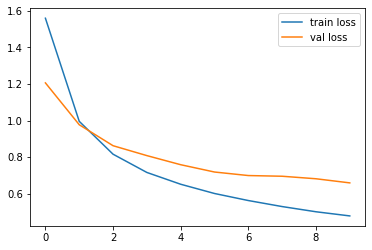

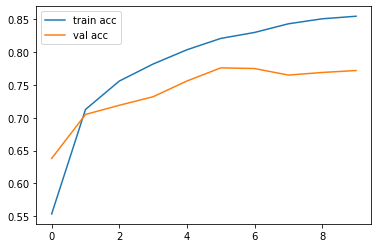

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model_vgg19.predict(testing_set_vg19)

In [ ]:
y_pred

array([[8.9393592e-01, 6.1427612e-02, 4.4575962e-03, ..., 4.0121679e-03,
        4.6328923e-06, 1.4087680e-04],
       [9.4224387e-01, 3.8261939e-02, 1.0555932e-02, ..., 3.5675825e-04,
        1.0409009e-06, 6.1703663e-06],
       [9.3512028e-01, 4.6169795e-02, 6.8787248e-03, ..., 3.4867725e-04,
        2.5677687e-06, 3.9002360e-05],
       ...,
       [4.1092481e-03, 2.3403522e-01, 2.0527820e-01, ..., 1.7927945e-04,
        8.7087613e-04, 2.3492610e-03],
       [7.3717086e-04, 2.4511954e-01, 2.1153168e-01, ..., 3.8273507e-04,
        3.5327032e-02, 3.2393372e-01],
       [1.1383873e-01, 5.7030536e-02, 1.3637081e-01, ..., 1.1396261e-01,
        4.1165475e-02, 2.4224642e-01]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5, 4, 1, 5, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 5, 1, 4, 3, 1, 1, 2, 0, 1, 3, 1, 1, 1,
       4, 6, 2, 2, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 8, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 5, 1, 2, 2, 4,
       1, 1, 0, 2, 3, 4, 1, 1, 4, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 3,
       2, 2, 4, 2, 2, 2, 1, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 4, 3,

In [ ]:
from collections import Counter

In [ ]:
cnt = Counter(y_pred)
cnt

Counter({0: 101,
         1: 86,
         2: 113,
         3: 77,
         4: 117,
         5: 102,
         6: 82,
         7: 95,
         8: 126,
         9: 101})

In [ ]:
model_vgg19.save("vgg_19tl.model")

INFO:tensorflow:Assets written to: vgg_19tl.model/assets


In [ ]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (128, 128))
    return new_array.reshape(-1, 128, 128, 3)

model = tf.keras.models.load_model("vgg_19tl.model")

In [ ]:
class_dict = trainning_set_vg19.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [ ]:
prediction = model.predict([prepare('/content/drive/MyDrive/archive/tomato/val/Tomato___Tomato_mosaic_virus/0befa341-0db3-49f4-b4fc-beeb05854bff___PSU_CG 2338.JPG')])
prediction_cls(prediction)

'Tomato___Tomato_mosaic_virus'

In [ ]:
prediction = model.predict([prepare('/content/drive/MyDrive/archive/tomato/val/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG')])
prediction_cls(prediction)

'Tomato___healthy'